In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Categorical Data and Encodings

#### Types of Data

Data can be grouped into two broad categories that can be further divided into sub-catagories:
+ Quantitative Data-A quantity
    + Discrete Data-Number of students in a class, etc.
    + Continuous Data-Heights of adult males, etc.
        + Note that the data in a column is considered to be a sample from a continuous distribution.
+ Qualitative Data-A quality
    + Nominal Data-Hair color (brown, blonde, red, etc.)
    + Ordinal Data-Grades (A, B, C, etc.)

So far in this class, we have been mainly working with Quantitative data.  Today, we study Qualitative Data.

Qualitative Data describes a quality, such as color, that cannot be represented with a number.  Some qualitative data has an implicit order and some qualitative data does not.

Qualitative Data without an implicit order is called *Nominal*.

Qualitative Data with an implicit order is called *Ordinal*.

##### Example 1

We look at the Car Acceptability dataset which contains all categorical data.  The goal with this dataset is to predict whether or not a particular row is for a car that is acceptable or not.

In [3]:
data = pd.read_csv('car.csv')

In [4]:
data.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Using the *value_counts* method we can view the distribution of categorical labels in the columns.

In [6]:
for col in list(data.columns):
    print(col)
    print(data[col].value_counts())
    print('-----------------------------------------')

Buying_Price
vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
-----------------------------------------
Maintenance_Price
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
-----------------------------------------
No_of_Doors
2        432
3        432
4        432
5more    432
Name: No_of_Doors, dtype: int64
-----------------------------------------
Person_Capacity
2       576
4       576
more    576
Name: Person_Capacity, dtype: int64
-----------------------------------------
Size_of_Luggage
small    576
med      576
big      576
Name: Size_of_Luggage, dtype: int64
-----------------------------------------
Safety
low     576
med     576
high    576
Name: Safety, dtype: int64
-----------------------------------------
Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64
-----------------------------------------


Which columns contain Nominal and which contain Ordinal Categorical data?

$\Box$

### Encodings

Machine Learning algorithms cannot make sense of categoical data.  Thus, we need a way to transform categorical data into numbers so that ML algorithms can use them.

*Encodings* are a way to transform catgorical data into discrete quantitative data.  

#### One-Hot Encoding

The *one-hot encoding* scheme essentially transforms a categorical column into a column of binary vectors.

The Sci-kit Learn one-hot encoder implements this idea.  Check out the [user guide](https://scikit-learn.org/stable/data_transforms.html). 

##### Example 2

We continue to work with the Car Acceptability dataset.  

First, we rename columns and modify the label column.

In [5]:
data = data.rename(columns = {'Buying_Price':'buy$',
 'Maintenance_Price':'maintain$',
 'No_of_Doors':"num_doors",
 'Person_Capacity':'num_seats',
 'Size_of_Luggage':'luggage',
 'Safety':'safety',
 'Car_Acceptability':'label'})

In [6]:
data['label'] = data.label.apply(lambda x: 0 if x == 'unacc' else 1)

In [7]:
data.head()

,buy$,maintain$,num_doors,num_seats,luggage,safety,label
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


To make this example simpler, we look only at one column.

In [20]:
example = data[['luggage', 'label']]
example.head()

,luggage,label
0,small,1
1,small,1
2,small,1
3,med,1
4,med,1


##### Step 1: Prep for the Transform

Value_counts helps to see what the different labels are.

In [21]:
example['luggage'].value_counts()

small    576
med      576
big      576
Name: luggage, dtype: int64

We make a list of labels.

In [22]:
sizes = list(set(example['luggage'].to_numpy()))
sizes

['big', 'small', 'med']

Construct input array X.  Sci-Kit Learn likes NumPy arrays, but I think a DataFrame will likely work too.

In [23]:
X = example['luggage'].to_numpy().reshape(-1,1)

Note that X has a weird shape.

In [24]:
X

array([['small'],
       ['small'],
       ['small'],
       ...,
       ['big'],
       ['big'],
       ['big']], dtype=object)

##### Step 2: Transform the Data

Instatiate and fit.

In [25]:
enc = OneHotEncoder(categories = [sizes])
enc.fit(X)

OneHotEncoder(categories=[['big', 'small', 'med']])

Transform.

In [26]:
Y = enc.transform(X).toarray()

Display the results.

In [27]:
df = pd.DataFrame(Y, columns = sizes)

In [28]:
df['luggage'] = example['luggage']
df = df[['luggage']+sizes]

In [29]:
df.head(10)

,luggage,big,small,med
0,small,0.0,1.0,0.0
1,small,0.0,1.0,0.0
2,small,0.0,1.0,0.0
3,med,0.0,0.0,1.0
4,med,0.0,0.0,1.0
5,med,0.0,0.0,1.0
6,big,1.0,0.0,0.0
7,big,1.0,0.0,0.0
8,big,1.0,0.0,0.0
9,small,0.0,1.0,0.0


$\Box$

##### Example 3

Now, we perform the encoding on the entire dataset and train a descision tree classifier.

Visualize and determine a baseline.

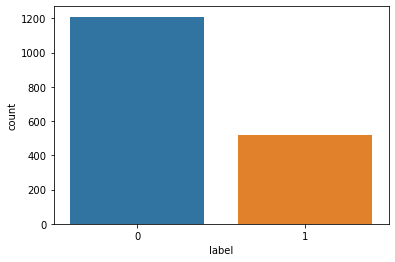

In [47]:
#0 = unacceptable, 1 = acceptable
ax = sns.countplot(x="label", data=data)

##### Baseline

In [48]:
(data['label']==0).sum()/data.shape[0]

0.7002314814814815

##### Step 1: Prep

In [49]:
#Create categories
buy_amount = list(set(data['buy$'].to_numpy()))
maintain_amount = list(set(data['maintain$'].to_numpy()))
doors = list(set(data['num_doors'].to_numpy()))
seats = list(set(data['num_seats'].to_numpy()))
luggage_sizes = list(set(data['luggage'].to_numpy()))
ratings = list(set(data['safety'].to_numpy()))

In [50]:
X = data.iloc[:, :-1].to_numpy()
y = data['label'].to_numpy()

##### Step 2: Transform

In [51]:
one_hot = OneHotEncoder(categories=[buy_amount, maintain_amount, doors, seats, luggage_sizes, ratings])

In [52]:
one_hot.fit(X)

OneHotEncoder(categories=[['vhigh', 'high', 'med', 'low'],
                          ['vhigh', 'high', 'med', 'low'],
                          ['3', '2', '5more', '4'], ['2', 'more', '4'],
                          ['big', 'small', 'med'], ['high', 'med', 'low']])

In [53]:
X = one_hot.transform(X).toarray()

In [54]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

##### Step 3: Training

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=250)

Instatiate and fit.

In [56]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

Predict.

In [57]:
y_pred=decisionTree.predict(X_test)

Accuracy.

In [58]:
(y_pred==y_test).sum()/len(y_test)

0.9768518518518519

In [59]:
decisionTree.get_n_leaves()

51

$\Box$

#### Ordinal Encoding

We have seen ordinal encoding in the Imputation Notebook.

The Sci-Kit Learn Ordinal Encoder transforms a categorical column into a column containing ordinal data.

##### Example 4

In [8]:
data.head()

,buy$,maintain$,num_doors,num_seats,luggage,safety,label
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [9]:
ord_ex = data[['num_doors', 'label']]

In [10]:
ord_ex.head()

,num_doors,label
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [30]:
doors = ['2', '3', '4', '5more']
doors

['2', '3', '4', '5more']

In [31]:
X = ord_ex['num_doors'].to_numpy().reshape(-1,1)

In [32]:
ord_enc = OrdinalEncoder(categories = [doors])
ord_enc.fit(X)

OrdinalEncoder(categories=[['2', '3', '4', '5more']])

In [33]:
Y = ord_enc.transform(X)

In [34]:
df1 = pd.DataFrame(Y, columns = ['num_doors_after_encoding'])

In [35]:
df1['num_doors_before_encoding'] = data['num_doors']

In [37]:
df1 = df1[['num_doors_before_encoding', 'num_doors_after_encoding']]

In [38]:
df1.head()

,num_doors_before_encoding,num_doors_after_encoding
0,2,0.0
1,2,0.0
2,2,0.0
3,2,0.0
4,2,0.0


$\Box$